In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms.functional import resize as tvf_resize
from models.csrnet_vgg import CSRNet

# ==== Config ====
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMAGE_DIR = "inference/test_images"
# MODEL_PATH = "build/csrnet_vgg_B.pth"
MODEL_PATH = "build/csrnet_vgg_A.pth"
SAVE_HEATMAP = True  # Set False jika tidak ingin simpan visualisasi density map
HEATMAP_DIR = "inference/heatmaps"

os.makedirs(HEATMAP_DIR, exist_ok=True)

# ==== Transform ====
transform = transforms.Compose([
    # transforms.Resize((384, 384)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# ==== Load Model ====
model = CSRNet().to(DEVICE)
# model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE, weights_only=False))
checkpoint = torch.load(MODEL_PATH, map_location=DEVICE, weights_only=False)
model.load_state_dict(checkpoint['state_dict'])
# print(f"MAE: {checkpoint['best_prec1']} - epoch: {checkpoint['epoch']}")
model.eval()

# ==== Predict ====
image_files = [f for f in os.listdir(
    IMAGE_DIR) if f.endswith(('.jpg', '.png'))]

for fname in image_files:
    path = os.path.join(IMAGE_DIR, fname)
    image = Image.open(path).convert('RGB')
    input_img = transform(image).unsqueeze(0).to(DEVICE)  # [1, 3, 384, 384]

    with torch.no_grad():
        output = model(input_img)  # [1, 1, H, W]
        density_map = output.squeeze().cpu().numpy()
        total_count = density_map.sum()

    print(f"{fname}: Estimated Count = {total_count:.2f}")

    # Optional: Save heatmap
    if SAVE_HEATMAP:
        # plt.figure(figsize=(4, 4))
        plt.imshow(density_map, cmap='jet')
        plt.axis('off')
        plt.title(f'Count: {total_count:.1f}')
        heatmap_path = os.path.join(
            HEATMAP_DIR, fname.replace('.jpg', '_heatmap.png'))
        plt.savefig(heatmap_path, bbox_inches='tight', pad_inches=0)
        plt.close()


34-peoples.jpg: Estimated Count = 34.13
271-peoples.jpg: Estimated Count = 271.26
93-peoples.jpg: Estimated Count = 93.22


In [22]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms.functional import resize as tvf_resize
from models.csrnet_mbv3_final import MobileCSRNet

# ==== Config ====
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMAGE_DIR = "inference/test_images"
# MODEL_PATH = "build/csrnet_vgg_B.pth"
MODEL_PATH = "build/kd_A_mobilenet_final.pth"
SAVE_HEATMAP = True  # Set False jika tidak ingin simpan visualisasi density map
HEATMAP_DIR = "inference/heatmaps"

os.makedirs(HEATMAP_DIR, exist_ok=True)

# ==== Transform ====
# transform = transforms.Compose([
#     # transforms.Resize((384, 384)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225]),

# ])

m_transform = transforms.Compose([
    transforms.Resize((640, 360)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
])

# ==== Load Model ====
model = MobileCSRNet().to(DEVICE)
# model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE, weights_only=False))
checkpoint = torch.load(MODEL_PATH, map_location=DEVICE, weights_only=False)
model.load_state_dict(checkpoint['state_dict'])
# print(f"MAE: {checkpoint['best_prec1']} - epoch: {checkpoint['epoch']}")
model.eval()

# ==== Predict ====
image_files = [f for f in os.listdir(
    IMAGE_DIR) if f.endswith(('.jpg', '.png'))]

for fname in image_files:
    path = os.path.join(IMAGE_DIR, fname)
    image = Image.open(path).convert('RGB')
    input_img = m_transform(image).unsqueeze(0).to(DEVICE)  # [1, 3, 384, 384]

    with torch.no_grad():
        output = model(input_img)  # [1, 1, H, W]
        density_map = output.squeeze().cpu().numpy()
        total_count = density_map.sum()

    print(f"{fname}: Estimated Count = {total_count:.2f}")

    # Optional: Save heatmap
    if SAVE_HEATMAP:
        # plt.figure(figsize=(4, 4))
        plt.imshow(density_map, cmap='jet')
        plt.axis('off')
        plt.title(f'Count: {total_count:.1f}')
        heatmap_path = os.path.join(
            HEATMAP_DIR, fname.replace('.jpg', '_heatmap.png'))
        plt.savefig(heatmap_path, bbox_inches='tight', pad_inches=0)
        plt.close()


RuntimeError: Error(s) in loading state_dict for MobileCSRNet:
	Missing key(s) in state_dict: "backend.1.weight", "backend.1.bias", "backend.1.running_mean", "backend.1.running_var", "backend.3.weight", "backend.3.bias", "backend.4.running_mean", "backend.4.running_var", "backend.7.weight", "backend.7.bias", "backend.7.running_mean", "backend.7.running_var", "backend.9.weight", "backend.9.bias", "backend.10.running_mean", "backend.10.running_var", "backend.12.weight", "backend.12.bias", "backend.13.weight", "backend.13.bias", "backend.13.running_mean", "backend.13.running_var", "backend.15.weight", "backend.15.bias", "backend.16.weight", "backend.16.bias", "backend.16.running_mean", "backend.16.running_var". 
	Unexpected key(s) in state_dict: "reduce_conv.0.weight", "reduce_conv.1.weight", "reduce_conv.1.bias", "reduce_conv.1.running_mean", "reduce_conv.1.running_var", "reduce_conv.1.num_batches_tracked", "backend.2.weight", "backend.2.bias", "backend.8.weight", "backend.8.bias". 
	size mismatch for backend.0.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 960, 3, 3]).
	size mismatch for backend.4.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for backend.6.weight: copying a param with shape torch.Size([256, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 512, 3, 3]).
	size mismatch for backend.6.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for backend.10.weight: copying a param with shape torch.Size([64, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for backend.10.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([256]).

In [3]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# ==== Config ====
IMAGE_DIR = "inference/test_images"
TFLITE_MODEL_PATH = "build/csrnet_mobile_B_float16.tflite"
HEATMAP_DIR = "inference/heatmaps_tflite"
SAVE_HEATMAP = True

os.makedirs(HEATMAP_DIR, exist_ok=True)

# ==== Load TFLite Model ====
interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL_PATH)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']  # e.g., [1, 512, 512, 3] or [1, 3, 512, 512]

is_channels_first = input_shape[1] == 3  # Check if input is NCHW or NHWC

# ==== Transform Function ====
def preprocess(image):
    image = image.resize((512, 512))
    image = np.array(image).astype(np.float16) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = (image - mean) / std
    if is_channels_first:
        image = np.transpose(image, (2, 0, 1))  # HWC -> CHW
    return np.expand_dims(image, axis=0).astype(np.float32)

# ==== Inference ====
image_files = [f for f in os.listdir(IMAGE_DIR) if f.endswith(('.jpg', '.png'))]

for fname in image_files:
    path = os.path.join(IMAGE_DIR, fname)
    image = Image.open(path).convert('RGB')
    input_tensor = preprocess(image)

    interpreter.set_tensor(input_details[0]['index'], input_tensor)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])  # [1, 1, 64, 64]

    density_map = output.squeeze()
    total_count = density_map.sum()

    print(f"{fname}: Estimated Count = {total_count:.2f}")

    if SAVE_HEATMAP:
        plt.imshow(density_map, cmap='jet')
        plt.axis('off')
        plt.title(f'Count: {total_count:.1f}')
        heatmap_path = os.path.join(HEATMAP_DIR, fname.replace('.jpg', '_heatmap.png'))
        plt.savefig(heatmap_path, bbox_inches='tight', pad_inches=0)
        plt.close()


34-peoples.jpg: Estimated Count = 53.42
271-peoples.jpg: Estimated Count = 176.60
93-peoples.jpg: Estimated Count = 101.64



0: 640x640 23 persons, 1 handbag, 5.5ms
1: 640x640 1 person, 5.5ms
2: 640x640 18 persons, 5.5ms
Speed: 3.0ms preprocess, 5.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


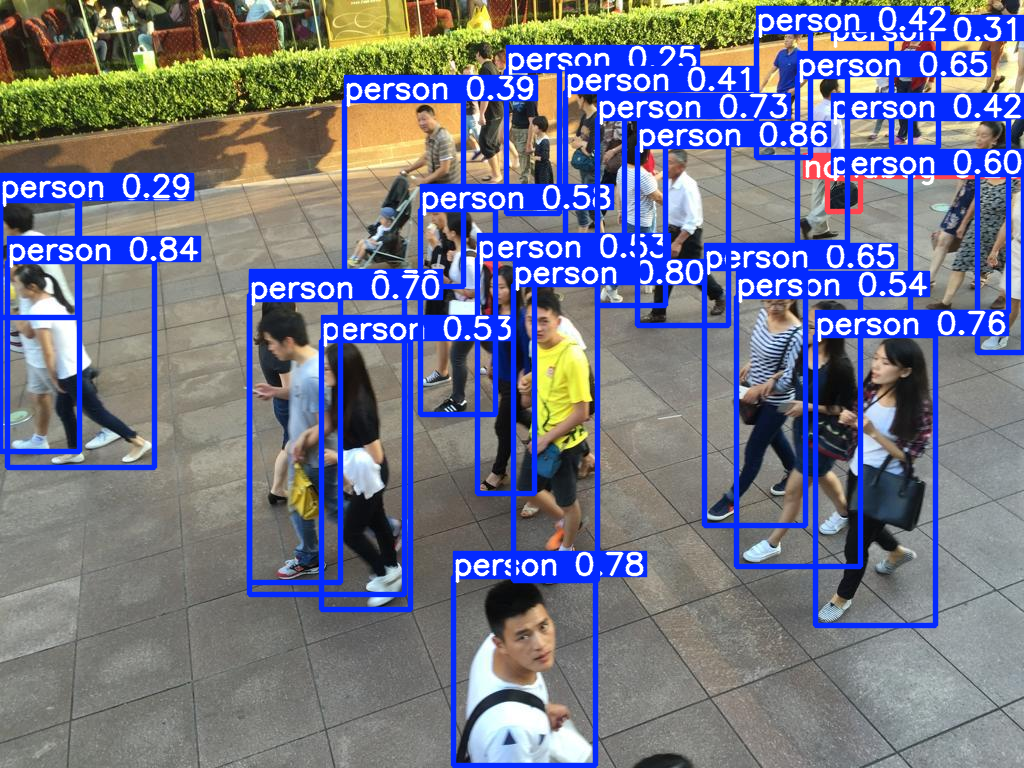

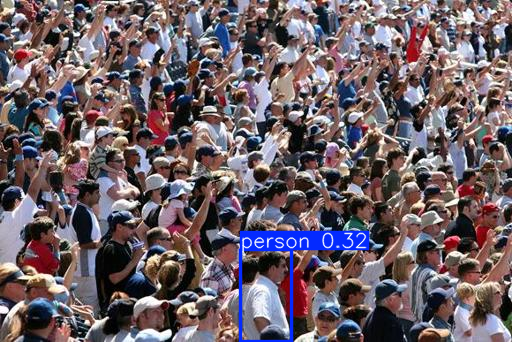

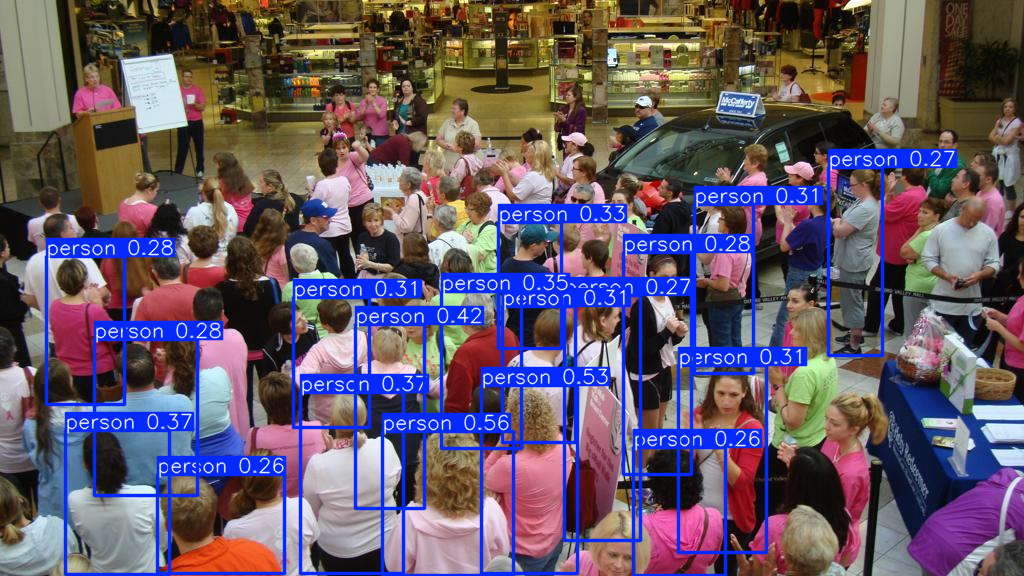

In [35]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

# ==== Config ====
IMAGE_DIR = "inference/test_images"
MODEL_PATH = "build/yolo11n.pt"
SAVE_HEATMAP = True  # Set False jika tidak ingin simpan visualisasi density map
RESULT_DIR = "inference/result"

os.makedirs(RESULT_DIR, exist_ok=True)

# Load a model
model = YOLO(MODEL_PATH)  # pretrained YOLO11n model
model.classes = [0]

image_files = [f for f in os.listdir(
    IMAGE_DIR) if f.endswith(('.jpg', '.png'))]
image_full_paths = []
for filename in image_files:
    full_path = os.path.join(IMAGE_DIR, filename)
    image_full_paths.append(full_path)

# Run batched inference on a list of images
results = model(image_full_paths)  # return a list of Results objects

# Process results list
for result in results:
    pCount = 0
    for box in result.boxes:
        if box.cls == 0:
            pCount += 1
    # total_objects = len(result.boxes[0])
    result_path = os.path.join(RESULT_DIR, "yolo_" + os.path.basename(result.path))
    result.show()  # display to screen
    
    plt.imshow(result.plot(pil=True), cmap='jet')
    plt.axis('off')
    plt.title(f'Count: {pCount}')
    plt.savefig(result_path, bbox_inches='tight', pad_inches=0)
    plt.close()